In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime, timedelta
today = datetime.today()
day   = today.day if today.day > 9 else '0' + str(today.day)
month = today.month if today.month > 9 else '0' + str(today.month)
today_str = '{}-{}-{}'.format(day, month, today.year)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston



In [12]:
df = pd.read_csv('owid-monkeypox-data.csv')


#View the data
df.head()

,iso_code,location,date,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
0,AND,Andorra,2022-07-25,1.0,NaN,1.0,12.653,12.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AND,Andorra,2022-07-26,2.0,NaN,3.0,25.306,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AND,Andorra,2022-07-27,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AND,Andorra,2022-07-28,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,2022-07-29,0.0,NaN,3.0,0.000,37.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Basic information

df.info()

#Describe the data

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         4953 non-null   object 
 1   location                         4953 non-null   object 
 2   date                             4953 non-null   object 
 3   new_cases                        4952 non-null   float64
 4   new_cases_smoothed               4455 non-null   float64
 5   total_cases                      4952 non-null   float64
 6   new_cases_per_million            4952 non-null   float64
 7   total_cases_per_million          4952 non-null   float64
 8   new_cases_smoothed_per_million   4455 non-null   float64
 9   new_deaths                       158 non-null    float64
 10  new_deaths_smoothed              137 non-null    float64
 11  total_deaths                     158 non-null    float64
 12  new_deaths_per_milli

,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
count,4952.000000,4455.000000,4952.000000,4952.000000,4952.000000,4455.000000,158.000000,137.000000,158.000000,158.000000,158.00000,137.000000
mean,19.477787,20.046148,577.192649,0.274735,7.951618,0.241667,0.164557,0.099197,3.018987,0.001772,0.00531,0.000066
std,114.221308,92.053273,3093.814233,1.461836,15.765790,0.452783,0.420203,0.195366,3.407507,0.009260,0.01018,0.000249
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.266000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
50%,0.000000,0.710000,13.000000,0.000000,1.228000,0.055000,0.000000,0.000000,1.000000,0.000000,0.00150,0.000000
75%,1.000000,5.000000,101.000000,0.017000,7.347750,0.300500,0.000000,0.140000,3.000000,0.000000,0.00500,0.000000
max,2063.000000,1016.430000,48227.000000,54.517000,136.016000,7.905000,2.000000,1.000000,13.000000,0.089000,0.08900,0.001000


In [14]:
#How many rows and attributes? 
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  4953
Number of Columns:  15


In [15]:
#checking missing values
df.isna().sum()

iso_code                              0
location                              0
date                                  0
new_cases                             1
new_cases_smoothed                  498
total_cases                           1
new_cases_per_million                 1
total_cases_per_million               1
new_cases_smoothed_per_million      498
new_deaths                         4795
new_deaths_smoothed                4816
total_deaths                       4795
new_deaths_per_million             4795
total_deaths_per_million           4795
new_deaths_smoothed_per_million    4816
dtype: int64

In [20]:
#Datatypes

df.dtypes

iso_code                                   object
location                                   object
date                                       object
new_cases                                 float64
new_cases_smoothed                        float64
total_cases                               float64
new_cases_per_million                     float64
total_cases_per_million                   float64
new_cases_smoothed_per_million            float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_deaths                              float64
new_deaths_per_million                    float64
total_deaths_per_million                  float64
new_deaths_smoothed_per_million           float64
date_cleaned                       datetime64[ns]
dtype: object

Text(0, 0.5, 'Count')

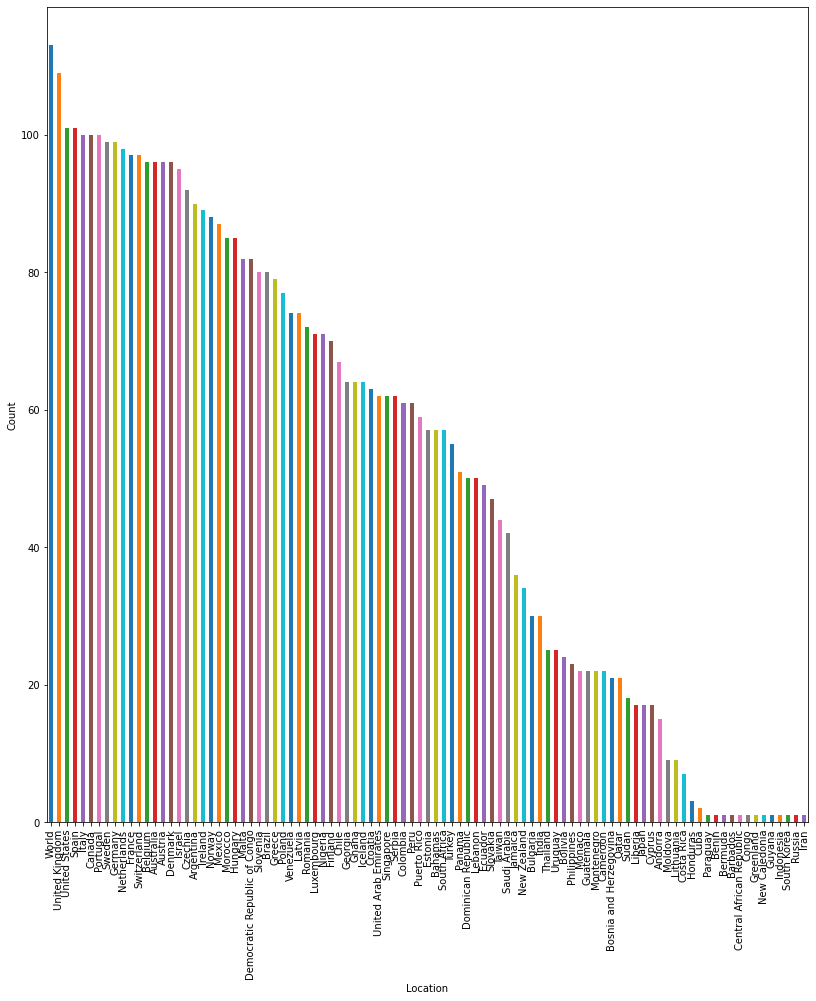

In [27]:
acumulated_df = df.groupby(['date','location'])['new_cases'].agg('sum').reset_index()

plt.figure(figsize=(30,15))
plt.subplot(1,2,1)
df['location'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.xlabel("Location")
plt.ylabel("Count")

In [24]:
print(df["location"].unique())

['Andorra' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Benin' 'Bulgaria' 'Bahamas' 'Bosnia and Herzegovina' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Central African Republic' 'Canada'
 'Switzerland' 'Chile' 'Cameroon' 'Democratic Republic of Congo' 'Congo'
 'Colombia' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Spain' 'Estonia' 'Finland' 'France'
 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Greenland' 'Guatemala'
 'Guyana' 'Honduras' 'Croatia' 'Hungary' 'Indonesia' 'India' 'Ireland'
 'Iran' 'Iceland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'South Korea'
 'Lebanon' 'Liberia' 'Lithuania' 'Luxembourg' 'Latvia' 'Morocco' 'Monaco'
 'Moldova' 'Mexico' 'Malta' 'Montenegro' 'New Caledonia' 'Nigeria'
 'Netherlands' 'Norway' 'New Zealand' 'Panama' 'Peru' 'Philippines'
 'Poland' 'Puerto Rico' 'Portugal' 'Paraguay' 'Qatar' 'Romania' 'Russia'
 'Saudi Arabia' 'Sudan' 'Singapore' 'Serbia' 'Slovakia' 'Slovenia'
 'Sweden' 'Thailand' 

As we can see, there's an unsual entry in the location dataframe, named "World", which is an aggregate of all the countries around the world, so we exclude it while visiualising data on basis of location

In [25]:
print("Total no.of countires listed in the dataset given are :- ",df["location"].unique().shape[0]- 1)

Total no.of countires listed in the dataset given are :-  94


In [26]:
df_loc = df[df["location"] != "World"]
df_loc.describe()

,new_cases,new_cases_smoothed,total_cases,new_cases_per_million,total_cases_per_million,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,total_deaths,new_deaths_per_million,total_deaths_per_million,new_deaths_smoothed_per_million
count,4839.000000,4348.000000,4839.000000,4839.000000,4839.000000,4348.000000,73.000000,58.000000,73.000000,73.000000,73.000000,58.000000
mean,9.966315,10.155370,289.758215,0.279889,8.099259,0.246300,0.178082,0.039828,1.630137,0.003836,0.011027,0.000155
std,57.948944,39.804765,1103.637553,1.478383,15.916376,0.457292,0.419738,0.096962,0.950246,0.013378,0.012803,0.000365
min,0.000000,0.000000,1.000000,0.000000,0.001000,0.000000,0.000000,0.000000,1.000000,0.000000,0.001000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.266000,0.000000,0.000000,0.000000,1.000000,0.000000,0.005000,0.000000
50%,0.000000,0.570000,12.000000,0.000000,1.236000,0.055000,0.000000,0.000000,1.000000,0.000000,0.005000,0.000000
75%,1.000000,4.000000,90.000000,0.012000,7.594000,0.314000,0.000000,0.000000,3.000000,0.000000,0.014000,0.000000
max,1411.000000,537.430000,17336.000000,54.517000,136.016000,7.905000,2.000000,0.290000,4.000000,0.089000,0.089000,0.001000


<AxesSubplot:>

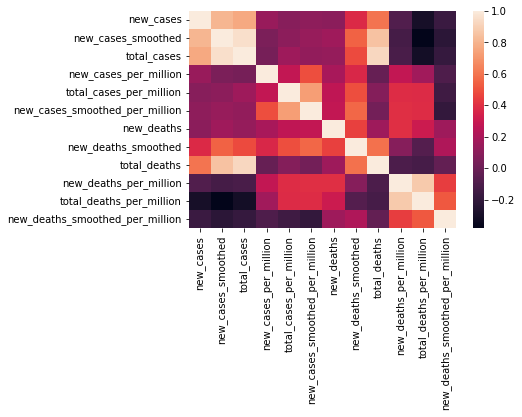

In [22]:
#Correlation plot
#Are the variables correlated to each other? 

df.corr()
sns.heatmap(df.corr())

In [23]:
#Any inconsistent, incomplete, duplicate or incorrect data? 
#Find the duplicates

df.duplicated().sum()
#0 implies no duplicate data


0

<AxesSubplot:xlabel='location', ylabel='new_cases'>

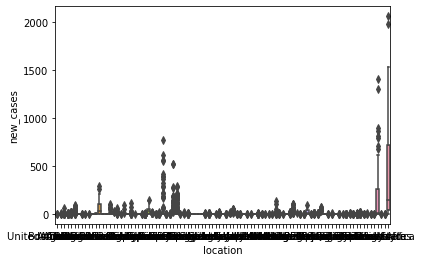

In [34]:
#finding outliers using boxplot
# Box Plot
import seaborn as sns
sns.boxplot(x="location",y="new_cases",data=df)